# **Facial Expression Recognition**


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive"

' 6 emotion NN .ipynb'
'CNN_Dog_Cat classification.ipynb'
'Colab Notebooks'
'minoreven synopsis.docx'
'NN using VGG16 three emotions.ipynb'
'Object recognition Somil.ipynb'
'Our Own NN 6 emotion.ipynb'
 Testing.csv
 Train.csv
'ZS Campus Beats Case Challenge - Confidentiality Form (002).gdoc'


In [0]:
#Read data
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/Train.csv')

Text(0.5, 1.0, 'Distribution of emotions,(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprised, 6=Neutral)')

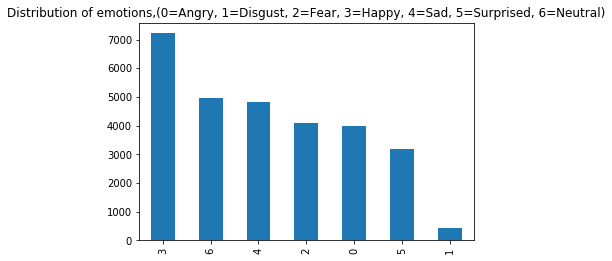

In [0]:
#Displaying total counts of different labels
import matplotlib.pyplot as plt
train.emotion.value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprised, 6=Neutral)")

As we can see we have unbalanced data as every associated emotion has a different class. So we first need to balance the dataset with equal training data per class.

Text(0.5, 1.0, 'Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprised, 5=Neutral)')

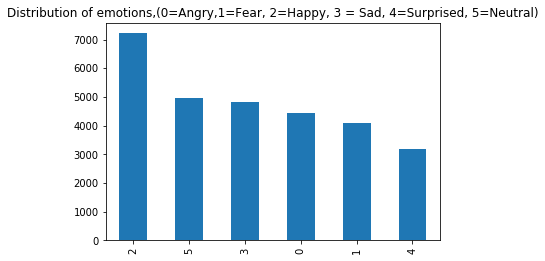

In [0]:
#There are very few samples of 'Disgust' so we will merge it with 'Angry'
train['emotion'] = train['emotion'].map( {0:0, 1:0, 2:1, 3:2, 4:3, 5:4, 6:5} ).astype(int)
train.emotion.value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprised, 5=Neutral)")


Text(0.5, 1.0, 'Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprise, 5=Neutral)')

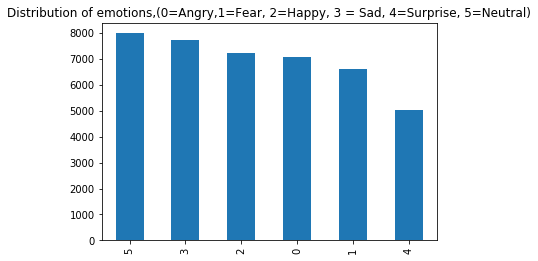

In [0]:
"Making copies of images to balance the class which prevents overfitting"
from sklearn.utils import shuffle

#As there are higher number of 'Happy' images, making copies of other images
df_copy = train[train.emotion != 2]
df_copy = df_copy[:int(0.6*len(df_copy.index))]
len(df_copy.index)
train_balanced = shuffle(pd.concat([train,df_copy]))

train_balanced.emotion.value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprise, 5=Neutral)")



In [0]:
#downloading the balanced classes csv file.
from google.colab import files

train_balanced.to_csv('balaclass.csv')
#files.download('balaclass.csv')

In [0]:
#Preparing test data
test = pd.read_csv('/content/drive/My Drive/Testing.csv')
test['emotion'] = test['emotion'].map( {0:0, 1:0, 2:1, 3:2, 4:3, 5:4, 6:5} ).astype(int)

### Till this step we were using the csv file format but then sir said to take up input to the CNN as images using flow_from_directory,so we had to convert the balanced training dataset to images and then send them as input to our CNN.Since our balanced training now has nearby equal images of all the classes so our neural network now wont overfit.

# **CNN architecture for classification**

In [1]:
from keras.models import Sequential

from keras.layers import Convolution2D

from keras.layers import MaxPooling2D,AveragePooling2D

from keras.layers import Flatten

from keras.layers import Dense

from keras.layers import Activation

from keras.layers import Dropout

from keras.optimizers import SGD

from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Convolution2D(64,(3,3), border_mode='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

    # 2nd Convolution layer
model.add(Convolution2D(128,(5,5), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

    # 3rd Convolution layer 
model.add(Convolution2D(512,(3,3), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

    # 4th Convolution layer
model.add(Convolution2D(512,(3,3), border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


    # Flattening
model.add(Flatten())

    # Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(48, 48, 1..., padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`


In [3]:
from zipfile import ZipFile
file_name='Testing Dataset.zip'

with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [4]:
from zipfile import ZipFile
file_name='Balanced Training Dataset.zip'

with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [5]:
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

train_datagen =  ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen =  ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('Balanced Training Dataset/Training',
                                                 target_size=(48, 48),
                                                 batch_size=128,
                                                 class_mode='categorical',color_mode='grayscale')

test_set = test_datagen.flow_from_directory('Balanced Training Dataset/PublicTest',
                                             target_size=(48, 48),
                                             batch_size=128,
                                             class_mode='categorical',color_mode='grayscale')

#Save partly trained model# save best weights
checkpointer = ModelCheckpoint(filepath='6_emo_50_epo.h5', verbose=1, save_best_only=True)

model.fit_generator(training_set,
                         steps_per_epoch=41604/100,
                         epochs=50,
                         validation_data=test_set,callbacks=[checkpointer],
                         validation_steps=3588/100,verbose=1)

model.summary()

Found 41604 images belonging to 6 classes.
Found 3588 images belonging to 6 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
417/416 [==============================] - 67s 162ms/step - loss: 1.6505 - acc: 0.3103 - val_loss: 1.5150 - val_acc: 0.3704

Epoch 00001: val_loss improved from inf to 1.51503, saving model to 6_emo_50_epo.h5
Epoch 2/50
417/416 [==============================] - 61s 145ms/step - loss: 1.3833 - acc: 0.4493 - val_loss: 1.3203 - val_acc: 0.4944

Epoch 00002: val_loss improved from 1.51503 to 1.32028, saving model to 6_emo_50_epo.h5
Epoch 3/50
417/416 [==============================] - 63s 150ms/step - loss: 1.2661 - acc: 0.5030 - val_loss: 1.1675 - val_acc: 0.5549

Epoch 00003: val_loss improved from 1.32028 to 1.16747, saving model to 6_emo_50_epo.h5
Epoch 4/50
417/416 [==============================] - 62s 148ms/step - loss: 1.2032 - acc: 0.5275 - val_loss: 1.1724 - val_acc: 0.5459

Epoch 00004: val_loss did not improve from 1.16747
Epoch 5/50
4

In [6]:
#yaha se trained model ka evaluation start hogaa
test1_set = test_datagen.flow_from_directory('Testing Dataset/PrivateTest',
                                             target_size=(48, 48),
                                             batch_size=32, g
                                             class_mode='categorical',color_mode='grayscale')

Found 3589 images belonging to 6 classes.


In [7]:
model.evaluate_generator(generator=test1_set,steps=32)

[1.0429019071161747, 0.685546875]

In [8]:
generator = test_datagen.flow_from_directory(
        'Testing Dataset/PrivateTest',
        target_size=(48, 48),
        batch_size=1,
        class_mode=None,  # only data, no labels
        shuffle=False,color_mode='grayscale')  # keep data in same order as labels

probabilities = model.predict_generator(generator, 3589)

Found 3589 images belonging to 6 classes.


In [9]:
probabilities

array([[1.7359856e-01, 5.4890513e-03, 1.0132790e-06, 9.6939981e-02,
        1.3464959e-05, 4.6883933e-03],
       [2.8836709e-01, 4.2295039e-02, 2.6065111e-04, 7.5608492e-05,
        3.0672739e-03, 4.5616674e-05],
       [7.8909069e-02, 4.0961263e-01, 6.2733889e-05, 1.3887882e-05,
        2.0575999e-05, 7.9461647e-04],
       ...,
       [8.6563826e-04, 1.9380450e-04, 5.3407705e-01, 1.4951825e-04,
        8.4358099e-04, 1.6801960e-03],
       [1.4719367e-03, 1.2449446e-01, 1.4193952e-03, 1.9228458e-02,
        4.1064700e-06, 1.9520947e-01],
       [1.1411309e-04, 2.4023652e-04, 6.2763691e-05, 8.9296699e-04,
        1.0493728e-06, 9.7333127e-01]], dtype=float32)

In [0]:
pba = [i * 10 for i in probabilities]

In [11]:
type(pba)

list

In [13]:
import numpy as np
pp = np.asarray(pba)
type(pp)

numpy.ndarray

In [0]:
po = pp.astype(int)

In [15]:
type(po)

numpy.ndarray

In [0]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
def confusion_plot_desc(cm):
    ax= plt.subplot()
    sb.heatmap(cm, annot=True, ax = ax, cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    labels = ['Angry','Fear','Happy','Sad','Surprise','Neutral']
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [39]:
#multiply each by 10 in prob array and then convert it inro scalar and then you'll be able to plot the confusionn matrix.
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = np.array([0] * 546 + [1] * 528 + [2] * 879 + [3] * 594 + [4] * 416 + [5] * 626)
y = [0,1,2,3,4,5]
y_pred =  po.argmax(axis = 1)
print(y_pred)
#for i in range(0,len(y_pred)):
 # if(y_pred[i] > 0.5):
  #   y_pred[i] = 1
#print(y_pred)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[0 0 1 ... 2 1 5]
[[352  52  17  66   3  56]
 [ 89 268  16  83  27  45]
 [ 35  10 762  16  15  41]
 [ 91  45  23 313   6 116]
 [ 17  46  18   5 317  13]
 [ 50  25  21  87   2 441]]


In [48]:
type(cm)

numpy.ndarray

In [0]:
# Funtions to print confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

def confusion_plot_desc(cm):
    labels = ['Angry','Fear','Happy','Sad','Surprise','Neutral']
    df_cm = pd.DataFrame(cm,index=[i for i in labels],columns = [i for i in labels])
    plt.figure(figsize=(10,10))
    #sb.set(font_scale=1.5)
    ax = plt.subplot()
    sb.heatmap(df_cm, annot=True, ax=ax, annot_kws={"size" :16}, cmap="Greens"); #annot=True to annotate cells
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    #ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
   
    
# function to print Description report
def print_Desc_report(y_true, y_pred):
    print('Testing Accuracy Of Description: {}'.format(accuracy_score(y_true, y_pred)))
    print('Testing F1 score Of Description: {}'.format(f1_score(y_true, y_pred, average='weighted')))
    print(metrics.classification_report(y_true, y_pred))
    cm = metrics.confusion_matrix(y_true, y_pred)
    confusion_plot_desc(cm)
    print()

    


Testing Accuracy Of Description: 0.6834772917247144
Testing F1 score Of Description: 0.684209791731472
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       546
           1       0.60      0.51      0.55       528
           2       0.89      0.87      0.88       879
           3       0.55      0.53      0.54       594
           4       0.86      0.76      0.81       416
           5       0.62      0.70      0.66       626

   micro avg       0.68      0.68      0.68      3589
   macro avg       0.68      0.67      0.67      3589
weighted avg       0.69      0.68      0.68      3589




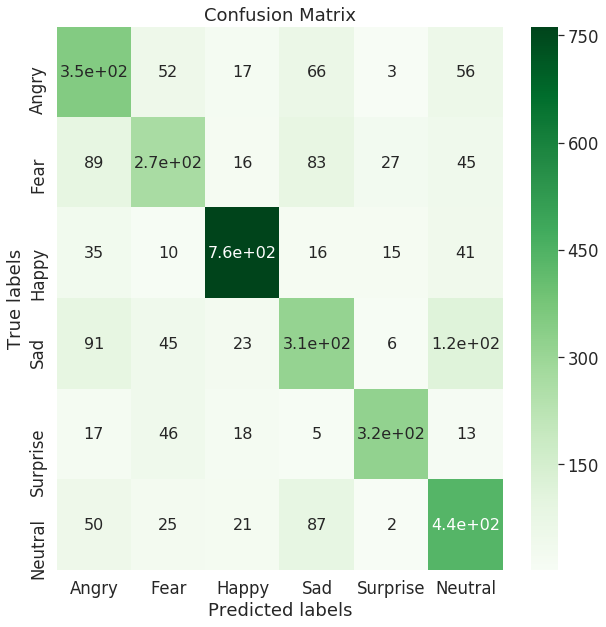

In [58]:
print_Desc_report(y_true, y_pred)

In [0]:
3